In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from imblearn.over_sampling import SMOTE


In [2]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv', sep=',')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [22]:
df['Gender'] = df['Gender'].astype("category").cat.codes.values
df['Occupation'] = df['Occupation'].astype("category").cat.codes.values
df['BMI Category'] = df['BMI Category'].astype("category").cat.codes.values
df['Blood Pressure'] = df['Blood Pressure'].astype("category").cat.codes.values


In [26]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('sem disturbio')
classes = df['Sleep Disorder'].unique()
#print(classes)

In [24]:
X = df.iloc[:, 1:12].values 
y = df['Sleep Disorder'].values

#print(X)
#print(y)

In [6]:
sm = SMOTE(random_state=42,k_neighbors=5)
dataset_res, ouput_label= sm.fit_resample(X,y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(dataset_res, ouput_label, test_size=0.2)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

In [18]:
model = tf.keras.models.load_model('my_model1.h5')

In [19]:
output_model_ = np.argmax(model.predict(X_test_std), axis=-1)
y_test_class = np.argmax(y_test_onehot, axis=-1)

5/5 [==============================] - 0s 1ms/step


In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Acurácia:', accuracy_score(y_test_class, output_model_))
print('Precisão:', precision_score(y_test_class, output_model_, average='macro'))
print('Sensibilidade:', recall_score(y_test_class, output_model_, average='macro'))
print('F1-Score:', f1_score(y_test_class, output_model_, average='macro'))

Acurácia: 0.9166666666666666
Precisão: 0.9181332695679898
Sensibilidade: 0.9179300175354695
F1-Score: 0.9179375453885257


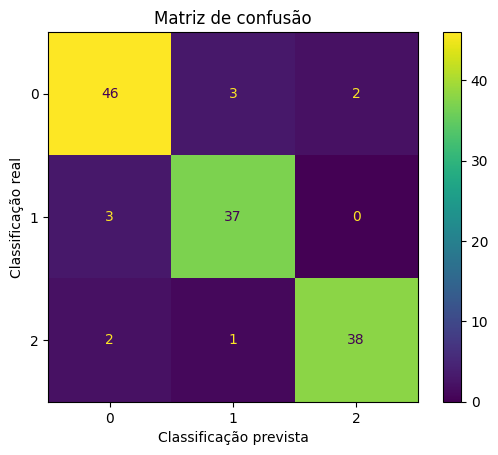

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_class, output_model_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title('Matriz de confusão')
disp.ax_.set_xlabel('Classificação prevista')
disp.ax_.set_ylabel('Classificação real')
plt.show()
